In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [109]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')
df.sample(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
454765,454765,-0.295513,0.237484,-0.024446,0.125422,-0.084595,-0.173741,-0.103784,-0.194561,-0.295264,...,0.372191,0.056722,-0.041424,0.379550,-0.254807,-0.757216,-0.217170,-0.519505,9592.47,1
110005,110005,0.891668,-0.574319,1.635719,-0.146747,-0.168996,0.645241,0.165164,-0.091998,1.498665,...,-0.068507,0.707428,-0.072254,1.554361,0.606402,1.224428,-0.169050,-0.041005,10251.71,0
366359,366359,-1.318100,0.351667,-0.980829,1.331450,-0.966772,0.142312,-1.300296,0.227916,-1.326879,...,-0.144621,0.312377,-0.058504,-0.727558,0.151679,0.581970,-0.065320,-0.293736,15266.96,1
70490,70490,0.948376,-0.539435,1.236964,-0.283384,-0.078735,0.555169,0.197599,-0.089278,1.259649,...,-0.135278,-0.081430,0.056089,0.216528,0.156498,0.768879,-0.206581,-0.049956,14783.33,0
238089,238089,1.822695,-0.761051,0.109705,-1.573639,0.079752,0.340533,0.214161,-0.157179,2.408399,...,-0.022604,0.797261,-0.032680,0.236782,0.067893,-0.113637,-0.202957,-0.201853,13639.74,0


# importing dataset

In [112]:
df.shape

(568630, 31)

# we have 568630 rows and 31 columns

In [113]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# we use describe command to find mathematical terms like min,max, Q1, Q2, Q3 and std dev

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

 # info command is used to find out the datatype

In [115]:
print(df.columns.tolist())

['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [116]:
cm=df.corr()
cm

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


<Axes: >

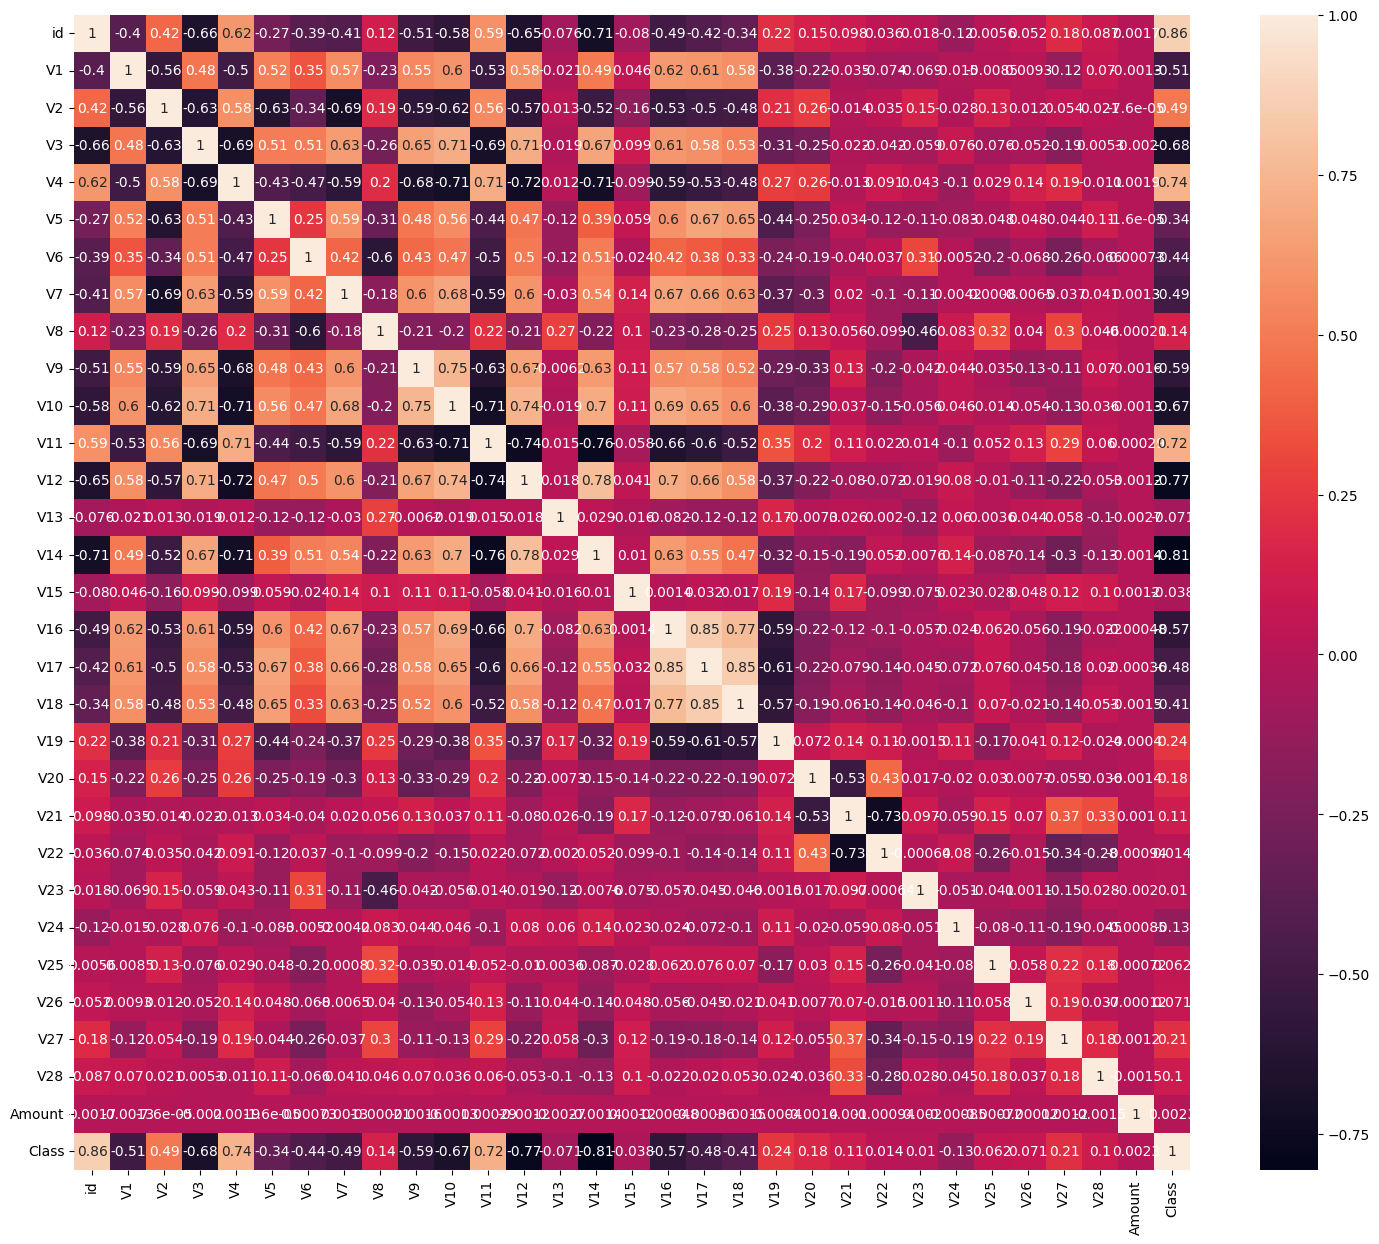

In [117]:
plt.figure(figsize=(18,15))
sns.heatmap(cm,annot=True)

In [118]:
corr_matrix = cm
print(corr_matrix["Class"].sort_values(ascending=False))

Class     1.000000
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64


In [119]:
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# Data is completely balanced as there are 50% values of class 1 and 50% of class 0

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <Ax

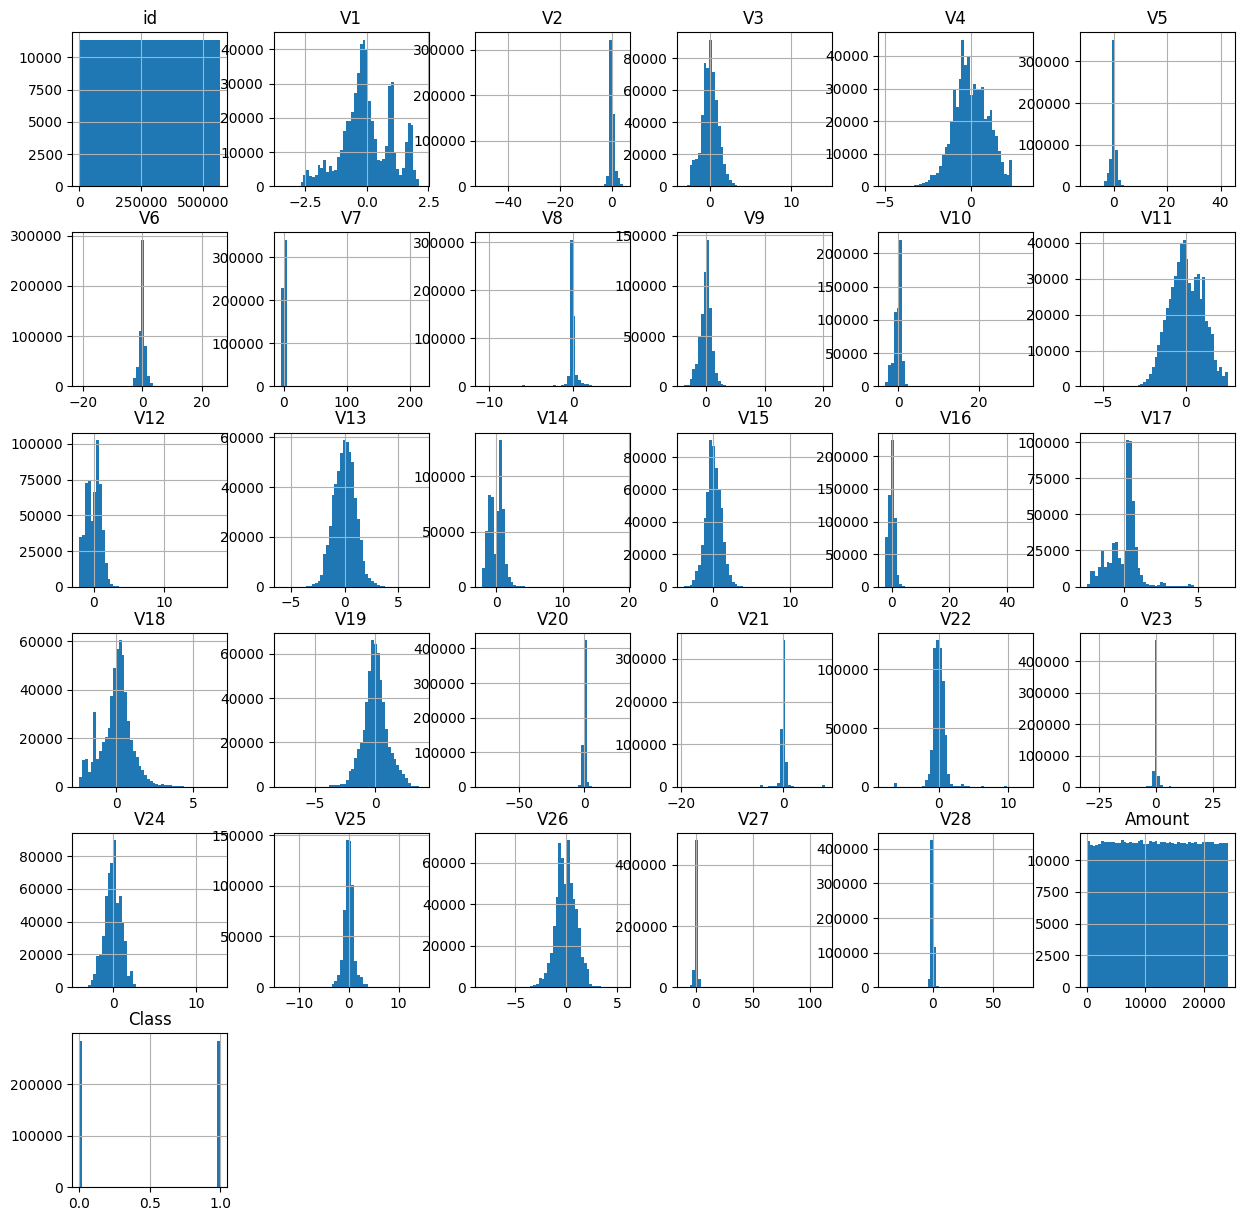

In [120]:
df.hist(figsize=(15,15),bins=50)

id           Axes(0.125,0.798085;0.0824468x0.0819149)
V1        Axes(0.223936,0.798085;0.0824468x0.0819149)
V2        Axes(0.322872,0.798085;0.0824468x0.0819149)
V3        Axes(0.421809,0.798085;0.0824468x0.0819149)
V4        Axes(0.520745,0.798085;0.0824468x0.0819149)
V5        Axes(0.619681,0.798085;0.0824468x0.0819149)
V6        Axes(0.718617,0.798085;0.0824468x0.0819149)
V7        Axes(0.817553,0.798085;0.0824468x0.0819149)
V8           Axes(0.125,0.699787;0.0824468x0.0819149)
V9        Axes(0.223936,0.699787;0.0824468x0.0819149)
V10       Axes(0.322872,0.699787;0.0824468x0.0819149)
V11       Axes(0.421809,0.699787;0.0824468x0.0819149)
V12       Axes(0.520745,0.699787;0.0824468x0.0819149)
V13       Axes(0.619681,0.699787;0.0824468x0.0819149)
V14       Axes(0.718617,0.699787;0.0824468x0.0819149)
V15       Axes(0.817553,0.699787;0.0824468x0.0819149)
V16          Axes(0.125,0.601489;0.0824468x0.0819149)
V17       Axes(0.223936,0.601489;0.0824468x0.0819149)
V18       Axes(0.322872,0.60

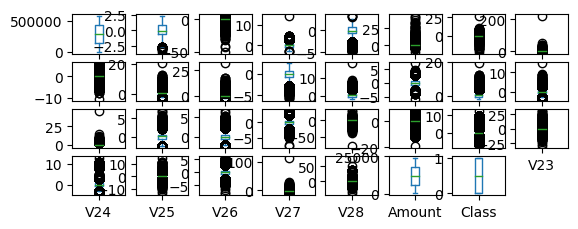

In [121]:
df.plot(kind='box',subplots = True, layout = (8,8),sharex=False)

In [122]:

abs_corr_matrix = corr_matrix.abs()
abs_corr_matrix

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.395741,0.424267,0.663655,0.617554,0.268445,0.387916,0.414288,0.121282,0.508427,...,0.097948,0.036106,0.017594,0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,0.395741,1.000000,0.561184,0.484499,0.498963,0.517462,0.354728,0.573381,0.226757,0.548973,...,0.034669,0.073729,0.068917,0.014651,0.008508,0.009281,0.122772,0.070111,0.001280,0.505761
V2,0.424267,0.561184,1.000000,0.627810,0.579638,0.631669,0.341040,0.694022,0.191321,0.585095,...,0.013570,0.035346,0.151906,0.027515,0.132443,0.012219,0.053835,0.021071,0.000076,0.491878
V3,0.663655,0.484499,0.627810,1.000000,0.687726,0.510351,0.508974,0.634336,0.263018,0.648615,...,0.021710,0.041970,0.058884,0.076460,0.076332,0.052056,0.190582,0.005346,0.002001,0.682095
V4,0.617554,0.498963,0.579638,0.687726,1.000000,0.429243,0.474403,0.588648,0.199013,0.676648,...,0.013093,0.091197,0.043266,0.102508,0.029402,0.136679,0.188036,0.011316,0.001859,0.735981
V5,0.268445,0.517462,0.631669,0.510351,0.429243,1.000000,0.245187,0.586828,0.314975,0.479614,...,0.034147,0.119152,0.113919,0.083243,0.047845,0.047771,0.043759,0.108422,0.000016,0.338639
V6,0.387916,0.354728,0.341040,0.508974,0.474403,0.245187,1.000000,0.418703,0.604491,0.432241,...,0.040153,0.036896,0.308598,0.005237,0.195340,0.067605,0.260783,0.065641,0.000734,0.435088
V7,0.414288,0.573381,0.694022,0.634336,0.588648,0.586828,0.418703,1.000000,0.180986,0.601789,...,0.019627,0.104043,0.111177,0.004152,0.000802,0.006488,0.036557,0.040732,0.001326,0.491234
V8,0.121282,0.226757,0.191321,0.263018,0.199013,0.314975,0.604491,0.180986,1.000000,0.208557,...,0.056416,0.098752,0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,0.000208,0.144294
V9,0.508427,0.548973,0.585095,0.648615,0.676648,0.479614,0.432241,0.601789,0.208557,1.000000,...,0.131001,0.204723,0.042371,0.044006,0.034885,0.131000,0.111842,0.069959,0.001589,0.585522


# # Get absolute values of correlations

In [123]:
x1 = abs_corr_matrix[abs_corr_matrix["Class"] > 0.5].index
x1

Index(['id', 'V1', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'Class'],
      dtype='object')

# Select columns where correlation with Class is greater than 0.5

# model building for 0.5 > criteria

In [124]:
x1=df.drop(['Class'],axis=1)
x1

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [125]:
y1 = df.Class
y1

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [127]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train1,y_train1)

LogisticRegression()

In [128]:
y_pred1 = lr.predict(x_test1)
y_pred1

array([1, 1, 1, ..., 1, 0, 1])

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score
accuracy_score(y_test1,y_pred1)

0.7893181858150291

# accuracy is 78.93% for logistic regression

In [130]:
cm1=confusion_matrix(y_test1,y_pred1)
cm1

array([[37522, 19202],
       [ 4758, 52244]])

In [131]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     56724
           1       0.73      0.92      0.81     57002

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



# lets build model on decision tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [133]:
y_pred12 = dt.predict(x_test1)

In [134]:
accuracy_score(y_test1,y_pred12)

0.9996658635668185

# accuracy for decision tree is 99% which leads to overfitting  

In [135]:
cm12=confusion_matrix(y_test1,y_pred12)
cm12

array([[56700,    24],
       [   14, 56988]])

In [136]:
print(classification_report(y_test1,y_pred12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# lets build model using K nearest neighbor

In [137]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [138]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred13 = kn.predict(x_test1)
y_pred13

array([1, 1, 1, ..., 0, 0, 1])

In [139]:
accuracy_score(y_test1,y_pred13)

0.9990855213407664

# accuracy for KNN prediction model is 99%

In [140]:
print(classification_report(y_test1,y_pred13))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [141]:
cm13= confusion_matrix(y_test1,y_pred13)
cm13

array([[56713,    11],
       [   93, 56909]])

# lets build GaussianNB  model

In [142]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train1,y_train1)

GaussianNB()

In [143]:
y_pred14 = gb.predict(x_test1)
y_pred14

array([1, 1, 1, ..., 0, 0, 1])

In [144]:
accuracy_score(y_test1,y_pred14)

0.9945483003007228

In [145]:
cm14=confusion_matrix(y_test1,y_pred14)
cm14

array([[56723,     1],
       [  619, 56383]])

In [146]:
print(classification_report(y_test1,y_pred14))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56724
           1       1.00      0.99      0.99     57002

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



# lets use ANN model of deep learning

In [147]:
# building an ANN model
ann = tf.keras.models.Sequential()

In [148]:
from tensorflow import keras
from tensorflow.keras import layers
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    # layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train1, y_train1, epochs=3)
model.evaluate(X_test1, y_test1)


Epoch 1/3
14216/14216 [==============================] - 29s 2ms/step - loss: 87.5279 - accuracy: 0.8221
Epoch 2/3
14216/14216 [==============================] - 29s 2ms/step - loss: 4.6267 - accuracy: 0.9227
Epoch 3/3
3554/3554 [==============================] - 6s 2ms/step - loss: 0.0714 - accuracy: 0.9655


[0.0713898167014122, 0.9655311703681946]

# Accuracy for ANN is 99.55%

# Lets use RNN

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Assuming your input is a sequence of 30 timesteps, each with one feature.
lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(30, 1), return_sequences=True),
    keras.layers.LSTM(25),
    keras.layers.Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.fit(X_train1, y_train1, epochs=10, batch_size=1000)

Epoch 1/10
455/455 [==============================] - 104s 217ms/step - loss: 0.2488 - accuracy: 0.9062
Epoch 2/10
455/455 [==============================] - 98s 215ms/step - loss: 0.1399 - accuracy: 0.9501
Epoch 3/10
455/455 [==============================] - 100s 220ms/step - loss: 0.1057 - accuracy: 0.9622
Epoch 4/10
455/455 [==============================] - 98s 215ms/step - loss: 0.0865 - accuracy: 0.9700
Epoch 5/10
455/455 [==============================] - 100s 219ms/step - loss: 0.0763 - accuracy: 0.9738
Epoch 6/10
455/455 [==============================] - 100s 220ms/step - loss: 0.0652 - accuracy: 0.9782
Epoch 7/10
455/455 [==============================] - 98s 214ms/step - loss: 0.0574 - accuracy: 0.9811
Epoch 8/10
455/455 [==============================] - 99s 218ms/step - loss: 0.0482 - accuracy: 0.9845
Epoch 9/10
455/455 [==============================] - 99s 216ms/step - loss: 0.0424 - accuracy: 0.9857
Epoch 10/10
439/455 [===========================>..] - ETA: 3s - loss

so far we have used 4 models to find the accuracy where we chose data which have correlation more than 50 % with target column - (Class)
# 1. Logistic regression - 79 %
# 2.  decision tree - 99 %
# 3. k nearest neighbor - 99 %
# 4. Gaussion NB - 99.45 %
# 5. Artificial neural netwrok - ANN - 99%
# 6. recurrent neural network - RNN - 98.74%

# for correlation greater than 60 %

In [106]:
x2 = abs_corr_matrix[abs_corr_matrix["Class"] > 0.6].index
x2

Index(['id', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'Class'], dtype='object')

In [107]:
x2=df.drop(['Class'],axis=1)
x2

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [87]:
y2=df.Class

# lets split the data into x and y

In [88]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=0)

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train2)

LogisticRegression()

In [90]:
y_pred2 = lr.predict(x_test2)
y_pred2

array([1, 1, 1, ..., 1, 0, 1])

In [91]:
accuracy_score(y_test2,y_pred2)

0.7893181858150291

# accuracy for logistic regression is 78%

In [92]:
cm2 = confusion_matrix(y_test2,y_pred2)
cm2

array([[37522, 19202],
       [ 4758, 52244]])

In [93]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     56724
           1       0.73      0.92      0.81     57002

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



# lets build another model - Decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(criterion='entropy',random_state=0)
tr.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [95]:
y_pred21 = tr.predict(x_test2)
y_pred21

array([1, 1, 1, ..., 0, 0, 1])

In [96]:
accuracy_score(y_test2,y_pred21)

0.9996658635668185

# accuracy for decision tree model is 99%

In [97]:
cm21 = confusion_matrix(y_test2,y_pred21)
cm21

array([[56700,    24],
       [   14, 56988]])

In [98]:
print(classification_report(y_test2,y_pred21))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# lets build Gaussian distribution model

In [99]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train2,y_train2)

GaussianNB()

In [100]:
y_pred22 = gb.predict(x_test2)
y_pred22

array([1, 1, 1, ..., 0, 0, 1])

In [101]:
accuracy_score(y_test2,y_pred22)

0.9945483003007228

# accuracy is 99% for gaussian distribution

In [102]:
cm =confusion_matrix(y_test2,y_pred22)
cm

array([[56723,     1],
       [  619, 56383]])

In [103]:
print(classification_report(y_test2,y_pred22))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56724
           1       1.00      0.99      0.99     57002

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



# lets build model using KNN model

In [104]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [149]:
y_pred23 = kn.predict(x_test2)
y_pred23

array([1, 1, 1, ..., 0, 0, 1])

In [150]:
accuracy_score(y_test2,y_pred23)

0.9990855213407664

# accuracy for KNN model is 99%

# so far we have used 4 models to find the accuracy where we chose data which have correlation more than 60 % with target column - (Class)
# 1. Logistic regression - 79 %
# 2.  decision tree - 99 %
# 3. k nearest neighbor - 99 %
# 4. Gaussion NB - 99.45 %
# 5. Artificial neural netwrok - ANN - 99%

# for correlation greater than 70%

In [151]:
x3 = abs_corr_matrix[abs_corr_matrix["Class"] > 0.7].index
x3

Index(['id', 'V4', 'V11', 'V12', 'V14', 'Class'], dtype='object')

In [152]:
x3 = df.drop(['Class'],axis=1)
x3

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [153]:
y3 =df.Class

# lets train the model with logistic regression

In [154]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.3,random_state=0)

In [155]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train3,y_train3)

LogisticRegression()

In [156]:
y_pred3 = lr.predict(x_test3)

In [157]:
accuracy_score(y_test3,y_pred3)

0.7896757704189602

# accuracy for logistic regression model is 78%

In [158]:
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[56497, 28675],
       [ 7204, 78213]])

In [159]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     85172
           1       0.73      0.92      0.81     85417

    accuracy                           0.79    170589
   macro avg       0.81      0.79      0.79    170589
weighted avg       0.81      0.79      0.79    170589



# lets build model with decision tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(criterion='entropy',random_state=0)
tr.fit(x_train3,y_train3)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [161]:
y_pred31 = tr.predict(x_test3)

In [162]:
accuracy_score(y_test3,y_pred31)

0.9995662088411328

# accuracy for decision tree is 99 %

# lets build model using K nearest neighbor

In [163]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train3,y_train3)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred32 = kn.predict(x_test3)
y_pred32

array([1, 1, 1, ..., 1, 0, 1])

In [84]:
accuracy_score(y_test3,y_pred32)

0.9990972454261412

# accuracy for kNN model is %

# so far we have used 4 models to find the accuracy where we chose data which have correlation more than 70 % with target column - (Class)
# 1. Logistic regression - 79 %
# 2.  decision tree - 99 %
# 3. k nearest neighbor - 99 %


lets build model with correlation more than 35%

In [171]:
x4 = abs_corr_matrix[abs_corr_matrix["Class"] > 0.35].index
x4

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'Class'],
      dtype='object')

In [173]:
x4 = df.drop(['Class'],axis=1)

In [174]:
y4 = df.Class

Lets split the dataset

In [176]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size=0.3,random_state=0)

In [177]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train4,y_train4)

LogisticRegression()

In [178]:
y_pred41 = tr.predict(x_test4)

In [179]:
accuracy_score(y_test4,y_pred41)

0.9995662088411328

##accuracy for logistic regression model is 99.95%

In [181]:
cm4= confusion_matrix(y_test4,y_pred41)
cm4

array([[85122,    50],
       [   24, 85393]])

In [183]:
print(classification_report(y_test4,y_pred41))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



# now lets build another model using Decision tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(criterion='entropy',random_state=0)
tr.fit(x_train4,y_train4)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [186]:
y_pred42 = tr.predict(x_test4)

In [187]:
accuracy_score(y_test4,y_pred42)

0.9995662088411328

# accuracy for decision tree model is 99%

In [188]:
cm42 = confusion_matrix(y_test4,y_pred42)
cm42

array([[85122,    50],
       [   24, 85393]])

In [189]:
print(classification_report(y_test4,y_pred42))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



# lest build another model using K nearest neighbor

In [190]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train4,y_train4)

KNeighborsClassifier(n_neighbors=3)

In [191]:
y_pred43 = kn.predict(x_test4)

In [192]:
accuracy_score(y_test4,y_pred43)

0.9990972454261412

# accuracy for KNN model is 99%

In [193]:
cm43 = confusion_matrix(y_test4,y_pred43)
cm43

array([[85159,    13],
       [  141, 85276]])

In [194]:
print(classification_report(y_test4,y_pred43))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



# so far we have used 3 models to find the accuracy where we chose data which have correlation more than 35 % with target column - (Class)
# 1. Logistic regression - 99 %
# 2.  decision tree - 99 %
# 3. k nearest neighbor - 99 %

In [198]:
result_50 = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','KNN','ANN','RNN','GaussianNB'],
          'Score':[78.93,99.96,99.55,99.90,98.74,99.45]
})
result_50

,Model,Score
0,Logistic Regression,78.93
1,Decision Tree,99.96
2,KNN,99.55
3,ANN,99.90
4,RNN,98.74
5,GaussianNB,99.45


In [199]:
result_60 = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','KNN','GaussianNB'],
          'Score':[78.93,99.96,99.45,99.90]
})
result_60

,Model,Score
0,Logistic Regression,78.93
1,Decision Tree,99.96
2,KNN,99.45
3,GaussianNB,99.90


In [200]:
result_70 = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','KNN'],
          'Score':[78.96,99.95,99.90]
})
result_70

,Model,Score
0,Logistic Regression,78.96
1,Decision Tree,99.95
2,KNN,99.90


In [201]:
result_35 = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','KNN'],
          'Score':[99.95,99.95,99.90]
})
result_35

,Model,Score
0,Logistic Regression,99.95
1,Decision Tree,99.95
2,KNN,99.90


In [203]:
final_result = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','KNN','ANN','RNN','GaussianNB'],
          'Score_50':[78.93,99.96,99.55,99.90,98.74,99.45],
         'Score_60': [78.93,99.96,99.45,00.00,00.00,99.90],
         'Score_70': [78.96,99.95,99.90,00.00,00.00,00.00],
         'Score_35': [99.95,99.95,99.90,00.00,00.00,00.00]
})
final_result

,Model,Score_50,Score_60,Score_70,Score_35
0,Logistic Regression,78.93,78.93,78.96,99.95
1,Decision Tree,99.96,99.96,99.95,99.95
2,KNN,99.55,99.45,99.90,99.90
3,ANN,99.90,0.00,0.00,0.00
4,RNN,98.74,0.00,0.00,0.00
5,GaussianNB,99.45,99.90,0.00,0.00


# final conclusion:-
# i have built 11 models so for and my conclusion is
# all models have accuracy of 99% just logistic regression has accuracy of 79%  when we chose correlation of more than 40%, 50% and 60%
# we used different correlation to check the optimum value of correlation but as data is sorted and not biased so we are getting accuracy for all the models near to 99%
# ANN and RNN both are also showing same accuracy as 99%